In [1]:
import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *          

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
_clear = ['bingroup']

def _clear_props(traces):
    for trace in traces:
        for prop in _clear:
            if hasattr(trace, prop):
                trace.update({prop: None})

def left_right(left, right, width=700, height=250, **kwargs):
    fig = make_subplots(cols=2, **kwargs)
    fig.update_layout(width=width, height=height)
    
    t1 = list(left.select_traces())
    t2 = list(right.select_traces())
    _clear_props([*t1, *t2])
    fig.add_traces(t1, rows=1, cols=1)
    fig.add_traces(t2, rows=1, cols=2)
    return fig

def margin(fig, **kwargs):
    return fig.update_layout(margin=kwargs)

def to_plotly_text(text):
    return text.strip().replace('\n', '<br>')

(ch:viz_plotly)=
# Creating Plots Using `plotly`

In this section, we cover the basics of the `plotly` Python package, the main tool we use in this book to create plots.

The `plotly` package has several advantages over other plotting libraries.
It creates interactive plots rather than static images.
When you create a plot in `plotly`, you can pan and zoom to see parts of the
plot that are too small to see normally.
You can also hover over plot elements, like the symbols in a scatter plot, to
see the raw data values.
Also, `plotly` can save plots using the SVG file format, which means that
images appear sharp even when zoomed in. If you're reading this chapter
in a PDF or paper copy of the book, we used this feature to render plot images.
Finally, it has a simple "express" API for creating basic plots, which helps when
you're doing exploratory analysis and want to quickly create many plots.

We go over the fundamentals of `plotly` in this section.
We recommend using the [official `plotly` documentation](https://plotly.com/python/) if you encounter
something that isn't covered here. 

## `Figure` and `Trace` Objects

Every plot in `plotly` is wrapped in a `Figure` object.
`Figure` objects keep track of what to draw.
For instance, a single `Figure` can draw a scatter plot on the left and 
a line plot on the right.
`Figure` objects also keep track of the plot layout, which includes the
size of the plot, title, legend, and annotations.

In [3]:
dogs = pd.read_csv('data/akc.csv').dropna()

The `plotly.express` module provides a concise API for making plots:

In [4]:
import plotly.express as px

We use `plotly.express` below to make a scatter plot of weight against height for the data on dog breeds. Notice that the return value from `.scatter()` is a `Figure` object:  

In [5]:
fig = px.scatter(dogs, x='height', y='weight', 
                 labels={'height':"Height (cm)", 'weight':"Weight (kg)"},
                 width=350, height=250)

fig.__class__

plotly.graph_objs._figure.Figure

Displaying a Figure object renders it to the screen.

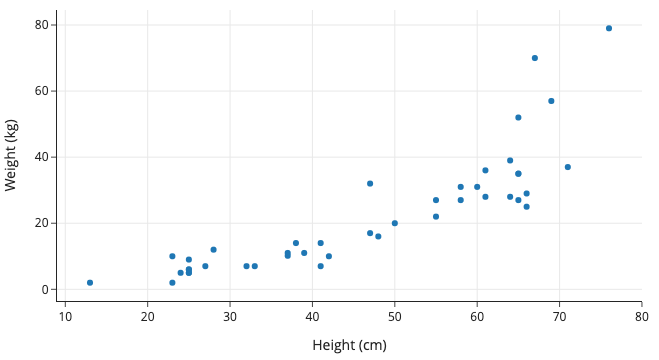

In [6]:
fig

This particular `Figure` holds one plot, but `Figure` objects can hold any number of plots. Below, we create a facet of three scatter plots:

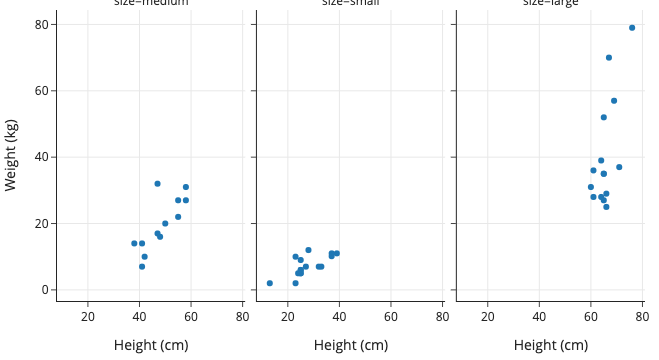

In [7]:
px.scatter(dogs, x='height', y='weight',
           facet_col='size',
           labels=dict(height="Height (cm)", weight="Weight (kg)"),
           width=550, height=250)

These three plots are stored in `Trace` objects.
However, we try to avoid manipulating `Trace` objects manually.
Instead, `plotly` provides functions that automatically create
facetted subplots, like the `px.scatter` function we used here.
Now that we have seen how to make a simple plot, we next show how to modify plots.

## Modifying Layout

We often need to change a figure's layout.
For instance, we might want to adjust the figure margins or change the axis range.
To do this, we can use the `Figure.update_layout()` method.
In the facet catter plot that we made the title is cut off because
the plot doesn't have large enough margins. We can correct this with `Figure.update_layout()`:

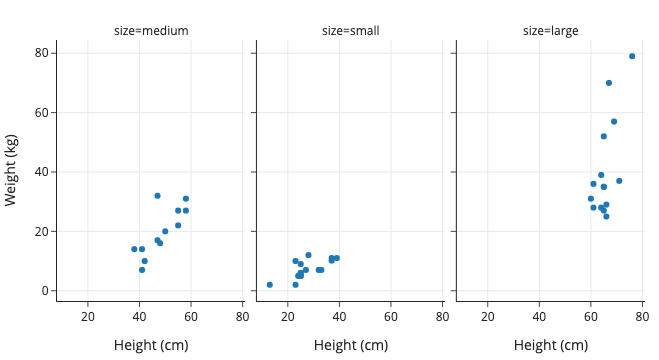

In [8]:
fig = px.scatter(dogs, x='height', y='weight',
                 facet_col='size',
                 labels=dict(height="Height (cm)", weight="Weight (kg)"),
                 width=550, height=250)

fig.update_layout(margin=dict(t=40))
fig

The `.update_layout()` method lets us modify any property of a layout.
This includes the plot title (`title`), margins (`margins` dictionary), 
and whether to display a legend (`showlegend`).
The `plotly` documentation has the full list of [layout properties](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html).

`Figure` objects also have `.update_xaxes()` and `.update_yaxes()` functions,
which are similar to `.update_layout()`. These two functions let us modify
properties of the axes, like the axis limits (`range`), number of ticks
(`nticks`), and axis label (`title`). Below, we adjust the range of the y-axis and change the title on the x-axis. We also add a title to the plot and update the layout so the title is not cut off:

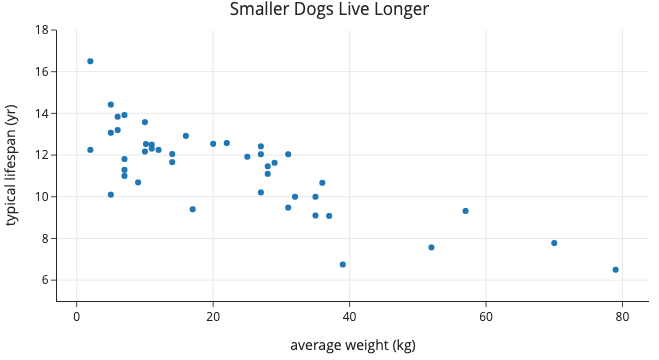

In [9]:
fig = px.scatter(dogs, x='weight', y='longevity',
                  title="Smaller Dogs Live Longer",
                 width=350, height=250)

fig.update_yaxes(range=[5, 18], title='typical lifespan (yr)')
fig.update_xaxes(title='average weight (kg)')
fig.update_layout(margin=dict(t=30))
fig

The `plotly` package comes with many plotting methods; we describe several of them in the next section.

## Plotting Functions

The `plotly` methods includes line plots, scatter plots, bar plots, box plots, and histograms. 
The API is similar for each type of plot.
The data frame is the first argument.
Then, we can specify a column of the data frame to place on the x-axis
and a column to place on the y-axis using the `x` and `y` keyword arguments. 

We begin with a line plot of median time each year for the runners in the Cherry Blossom race:

In [16]:
run = pd.read_csv('data/cherryBlossomMen.csv')
medians = run.groupby('year')[['time']].median().reset_index()

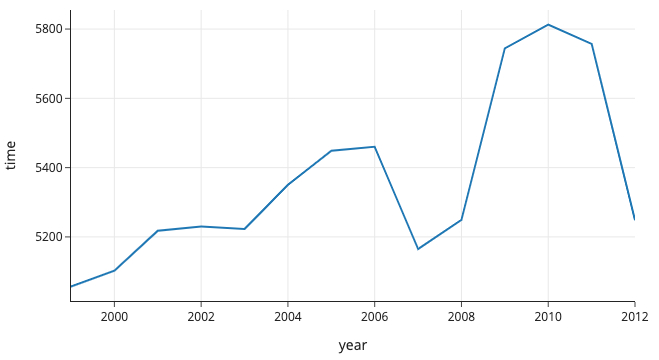

In [17]:
px.line(medians, x='year', y='time',
        width=350, height=250)

Next, we make a bar plot of average longevity for different size dog breeds:

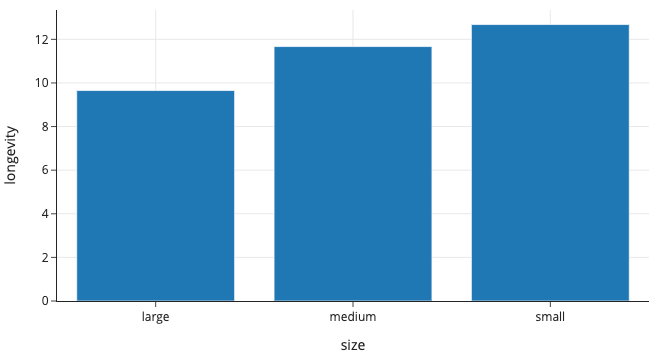

In [18]:
lifespans = dogs.groupby('size')['longevity'].mean().reset_index()

px.bar(lifespans, x='size', y='longevity',
       width=350, height=250)

Plotting methods in `plotly` also contain arguments for making facet plots.
We can facet using color on the same plot, plotting symbol or line style.
Or we can facet into multiple subplots. Below are examples of each.
We first make a scatter plot of height and weight of dog breeds and use different plotting symbols and colors to facet within the plot by size:

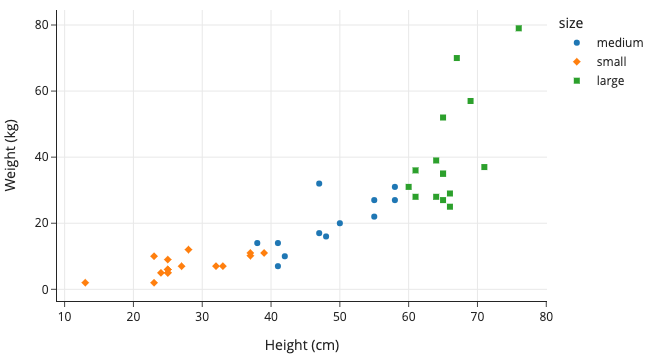

In [10]:
fig = px.scatter(dogs, x='height', y='weight', 
                 color='size', symbol='size',
                 labels=dict(height="Height (cm)", weight="Weight (kg)"),
                 width=350, height=250)
fig

The plot below shows side-by-side histograms of longevity for each breed size. Here we facet by columns. 

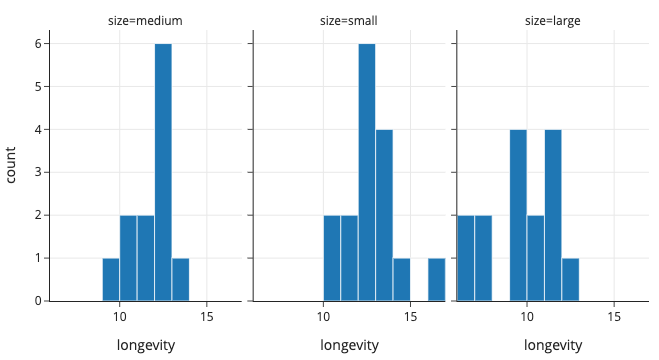

In [20]:
fig = px.histogram(dogs, x='longevity', facet_col='size',
                   width=550, height=250)
fig.update_layout(margin=dict(t=30))

For the complete list of plotting functions, see the main documentation for
[plotly](https://plotly.com/graphing-libraries/) or [plotly.express](https://plotly.com/python-api-reference/plotly.express.html), the submodule of `plotly` that we 
primarily use in the book. 

To add context to a plot, we use the `plotly` annotation methods; these are described next.

## Annotations

The `Figure.add_annotation()` method places annotations on a `plotly` figure.
These annotations are line segments with text and an optional arrow. The location of the arrow
is set using the `x` and `y` parameters, and we can shift the text from its default position using the `ax` and `ay` parameters. Below, we annotate the scatter diagram with information about one of the points:

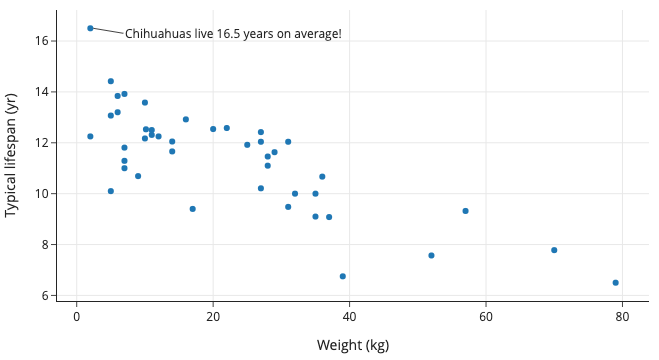

In [12]:
fig = px.scatter(dogs, x='weight', y='longevity',
                 labels=dict(weight="Weight (kg)", longevity="Typical lifespan (yr)"),
                 width=350, height=250)

fig.add_annotation(text='Chihuahuas live 16.5 years on average!',
                   x=2, y=16.5,
                   ax=30, ay=5,
                   xshift=3,
                   xanchor='left')
fig

This section covered the basics of creating plots using the `plotly` Python
package. We introduced the `Figure` object, which is the object `plotly`
uses to store plots and their layouts.
We covered the basic plot types that `plotly` makes available, and
a few ways to customize plots by adjusting the layout and axes, and by
adding annotations. 
In the next section, we briefly compare `plotly` to other common tools for creating
visualizations in Python.